# Exploratory Data Analysis of the Hotel Customer Dataset
**Evamaria Saunders** <br>
**24/11/2021** <br>
**Dataset**: https://www.kaggle.com/nantonio/a-hotels-customers-dataset?resource=download <br>
*More Information*: https://www.sciencedirect.com/science/article/pii/S2352340920314645?via%3Dihub <br>

<br>

## Part 1: Preparations

In [1]:
#import relevant libraries/packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#open dataset
file_dir = "C:/Users/Computer/Documents/Evamaria's Documents/Personal Projects/Data/HotelCustomersDataset.xlsx"
dataset = pd.read_excel(file_dir)

In [ ]:
print(dataset.dtypes)
print(dataset.shape)
dataset.head()

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')
ID                        int64
Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights     

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


The initial datasets consists of 31 columns and 83590 rows which contain customer information from a Hotel in Lisbon. Detailed information about each variable can be found on the link specified at the top. The most relevant variables can be grouped into several categories: 
1. Demographical: $Age$, $Nationality$
2. Main Booking Statistics: $LodgingRevenue$, $OtherRevenue$, $BookingsCanceled$, $BookingsNoShowed$, $BookingsCheckedIn$, $PersonsNights$, $RoomNights$
3. Booking Preferences: $SRHighFloor$, $SRLowFloor$, $SRAccessibleRoom$, $SRMediumFloor$, $SRBathtub$, $SRShower$, $SRCrib$, $SRKingSizeBed$, $SRTwinBed$, $SRNearElevator$, $SRAwayFromElevator$, $SRNoAlcoholInMiniBar$, $SRQuietRoom$
4. Time-Related Variables: $DaysSinceCreation$, $AverageLeadTime$, $DaysSinceLastStay$, $DaysSinceFirstStay$
5. Other: $DistributionChannel$, $MarketSegment$

In the following sections, these variables will be explored statistically and visually based on these categories. Notably, for now steps relevant for pre-processing such as checking for outliers, missing values, or altering variable types will be skipped. The intention is to first gain an understanding of the dataset while practicing my exploratory data analysis skills, before moving on to proper data pre-processing.

## Part 2: Demographics

Regarding **age**, a typical customer seems to be in the range of 40 to around 55 with a mean of roughly 45. The distribution looks aproximately normal with ages of 20 and below as well as 65 and above being much less common. 
In terms of **Nationality**, the hotel's top customers are from France, followed unexpectedly by Portugal itself, as well as several other European countries such as Germany, Spain, and Italy. 

In [ ]:
#basic descriptive statistics
print(dataset["Age"].describe())
print("\n")
print(dataset["Nationality"].describe())

count    79811.000000
mean        45.398028
std         16.572368
min        -11.000000
25%         34.000000
50%         46.000000
75%         57.000000
max        122.000000
Name: Age, dtype: float64


count     83590
unique      188
top         FRA
freq      12422
Name: Nationality, dtype: object


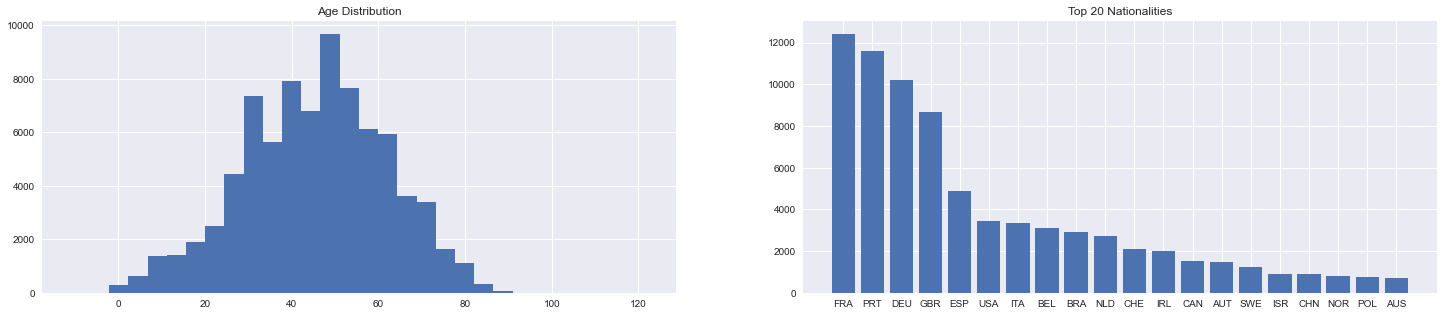

In [405]:
#plot age and nationality
plt.style.use("seaborn")
figure, axis = plt.subplots(1,2, figsize = (25,5))

axis[0].hist(dataset["Age"], 30)
axis[0].set_title("Age Distribution")

axis[1].bar(dataset["Nationality"].value_counts().index[0:20], dataset["Nationality"].value_counts()[0:20])
axis[1].set_title("Top 20 Nationalities")

plt.show()

In [406]:
dataset["Nationality"].value_counts()[0:20]

FRA    12422
PRT    11597
DEU    10232
GBR     8656
ESP     4902
USA     3429
ITA     3365
BEL     3119
BRA     2902
NLD     2725
CHE     2108
IRL     1996
CAN     1524
AUT     1489
SWE     1231
ISR      900
CHN      891
NOR      795
POL      760
AUS      723
Name: Nationality, dtype: int64

## Part 3: Main Booking Statistics

In [9]:
#basic descriptive statistics
round(dataset[["LodgingRevenue", "OtherRevenue", "BookingsCanceled", "BookingsNoShowed", "BookingsCheckedIn", "PersonsNights", "RoomNights"]].describe(), 2)

,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights
count,83590.00,83590.00,83590.00,83590.00,83590.00,83590.00,83590.00
mean,298.80,67.59,0.00,0.00,0.79,4.65,2.36
std,372.85,114.33,0.07,0.03,0.70,4.57,2.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,59.00,2.00,0.00,0.00,1.00,1.00,1.00
50%,234.00,38.50,0.00,0.00,1.00,4.00,2.00
75%,402.00,87.68,0.00,0.00,1.00,6.00,4.00
max,21781.00,7730.25,9.00,3.00,66.00,116.00,185.00


### Part 3.1: Revenue
In terms of **Revenue**, it should first be noted that the total Revenue consist of contributions from almost 76% of customers. Additionally, in almost all cases (> 99%), these individual contributions consisted of both lodging and other forms of revenue. In terms of magnitude, the revenue obtained from lodging is on average substantially higher than when obtained from other sources. Moreover, both variables show very extreme outliers; hence, the top 5% were excluded in both cases for the sake of visualisation. Notably, the Lodging Revenue shows some resemblance of symmetry while the Other Revenue decreases exponentially from the left. 

In [4]:
#absolute crosstab of whether or not the hotel reported any revenue for a customer
pd.crosstab(dataset["LodgingRevenue"] > 0, dataset["OtherRevenue"] > 0, margins = True)

OtherRevenue,False,True,All
LodgingRevenue,,,
False,20205,203,20408
True,9,63173,63182
All,20214,63376,83590


In [23]:
#relative crosstab of whether or not the hotel reported any revenue for a customer
round(pd.crosstab(dataset["LodgingRevenue"] > 0, dataset["OtherRevenue"] > 0, margins = True, normalize = "all"),4)*100

OtherRevenue,False,True,All
LodgingRevenue,,,
False,24.17,0.24,24.41
True,0.01,75.57,75.59
All,24.18,75.82,100.00


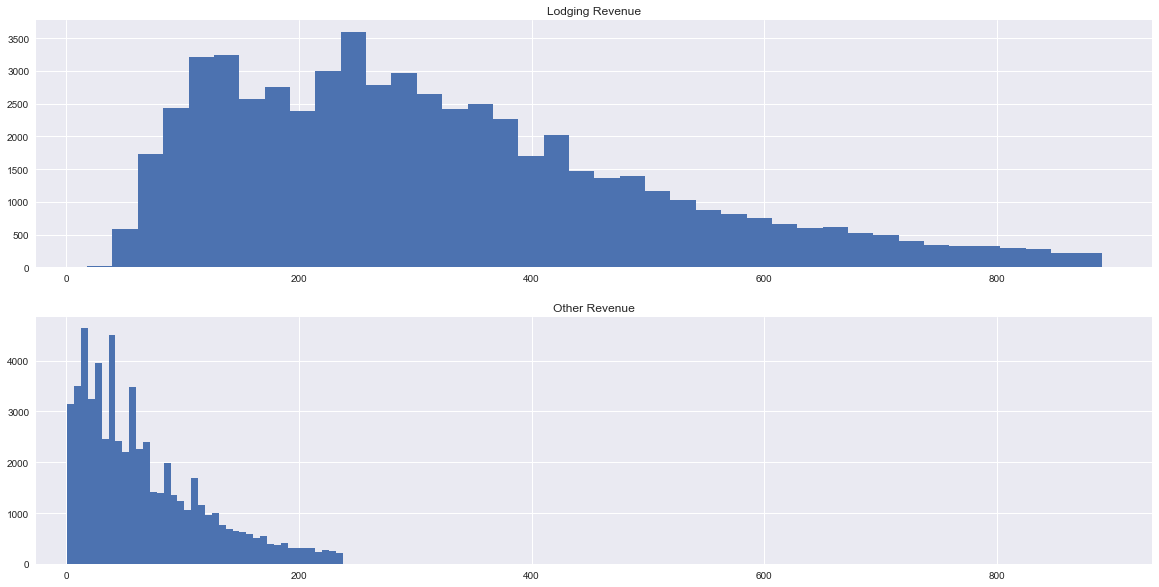

In [4]:
#plot revenue
plt.style.use("seaborn")
figure, axis = plt.subplots(2,1, figsize = (20,10))

#exclude: customers where no revenue was obtained & everything above the 99th percentile
filtered_lrev = dataset["LodgingRevenue"][(dataset["LodgingRevenue"] < dataset["LodgingRevenue"].quantile(0.95)) & (dataset["LodgingRevenue"] > 0)]
filtered_orev = dataset["OtherRevenue"][(dataset["OtherRevenue"] < dataset["OtherRevenue"].quantile(0.95)) & (dataset["OtherRevenue"] > 0)]

axis[0].hist(filtered_lrev, 40)
axis[0].set_title("Lodging Revenue")

plt.setp(axis, xlim=axis[0].get_xlim())

axis[1].hist(filtered_orev,40)
axis[1].set_title("Other Revenue")

plt.show()

### Part 3.2: Booking Outcomes
In terms of **Booking Outcomes**, around 76% of Customers have checked in at least once, although less than 2% checked in more than once. In other words, this hotel attracts very few repeat customers. On a positive note, the proportions of cancellations or no shows are both very low. Two notable customers are one person that cancelled a total of 9 times, as well as one person that did not show three times. 
<br>
In terms of the total nights customers have checked in for: 

In [3]:
#frequency table for Booking Outcomes
freq = pd.DataFrame(range(dataset["BookingsCheckedIn"].max()))
freq.columns = ["index"]
checked_in = dataset["BookingsCheckedIn"].value_counts().sort_index().to_frame().reset_index()
canceled  = dataset["BookingsCanceled"].value_counts().sort_index().to_frame().reset_index()
noshowed = dataset["BookingsNoShowed"].value_counts().sort_index().to_frame().reset_index()

merged_df1 = freq.merge(checked_in, how = "left")
merged_df2 = merged_df1.merge(canceled, how = "left")
merged_final = merged_df2.merge(noshowed, how = "left")
merged_final.fillna(0, inplace = True)

merged_final[0:11]

,index,BookingsCheckedIn,BookingsCanceled,BookingsNoShowed
0,0,19920.0,83472.0,83546.0
1,1,62215.0,92.0,36.0
2,2,1147.0,12.0,7.0
3,3,132.0,8.0,1.0
4,4,59.0,5.0,0.0
5,5,20.0,0.0,0.0
6,6,20.0,0.0,0.0
7,7,16.0,0.0,0.0
8,8,10.0,0.0,0.0
9,9,9.0,1.0,0.0


In [61]:
#percentage of customers with 0 versus 1+ check-ins
print((dataset["BookingsCheckedIn"] == 0).value_counts()/len(dataset["BookingsCheckedIn"]))

#percentage of customers with more than 1 checkin
print("\n", round(len(dataset["BookingsCheckedIn"][dataset["BookingsCheckedIn"] > 1])/len(dataset["BookingsCheckedIn"]),4))

False    0.761694
True     0.238306
Name: BookingsCheckedIn, dtype: float64

 0.0174


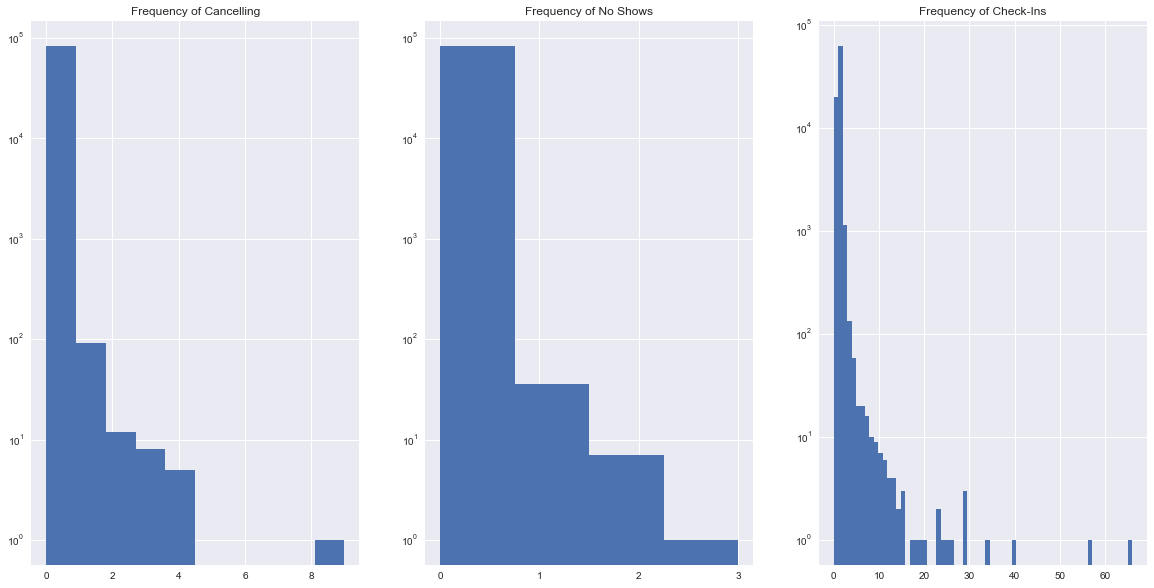

In [5]:
#plot bookings cancelled, no shows, and checkins
#plots use log scale as the majority of values are equal to 0
plt.style.use("seaborn")
figure, axis = plt.subplots(1,3, figsize = (20,10))

axis[0].hist(dataset["BookingsCanceled"],10)
axis[0].set_yscale("log")
axis[0].set_title("Frequency of Cancelling")

axis[1].hist(dataset["BookingsNoShowed"],4)
axis[1].set_yscale("log")
axis[1].set_xticks(ticks = [0,1,2,3])
axis[1].set_title("Frequency of No Shows")

axis[2].hist(dataset["BookingsCheckedIn"], 67)
axis[2].set_yscale("log")
axis[2].set_title("Frequency of Check-Ins")

plt.show()

### Part 3.3: Room\*Nights & Persons\*Nights
Concerning the "total number of nights * total number of rooms" as well as the "total number of nights * total number of people" per customers, several observations can be made. Firstly, both variables show rather extreme outliers, and even without these outliers the general distributions show a skew to the right. In other words, staying fewer nights, booking fewer rooms, or coming with fewer people is more common. This is in line with the observation that the majority of customers are one-time customers. 
In terms of the relationship between these two variables, the plot shows several linear trends. When examining this more closely for the one-time customers (where the pattern  is not clouded by multiple non-homogenous trips), we can draw certain conclusions about the minimum number of guests per booking. Specifically, for one time bookings bookings with at least 2 people are most common. 

In [19]:
#only select customers that have spent more than 0 nights
nights = dataset[["RoomNights", "PersonsNights"]][dataset["RoomNights"] > 0]
print(nights.describe())

#there are two cases where PersonsNights is equal to 0 despite the customer having spent more than 0 nights; could these cases represent outliers? 
nights[nights["PersonsNights"] == 0]

         RoomNights  PersonsNights
count  63670.000000   63670.000000
mean       3.096435       6.103675
std        2.133161       4.302674
min        1.000000       0.000000
25%        2.000000       3.000000
50%        3.000000       6.000000
75%        4.000000       8.000000
max      185.000000     116.000000


,RoomNights,PersonsNights
43667,4,0
80019,2,0


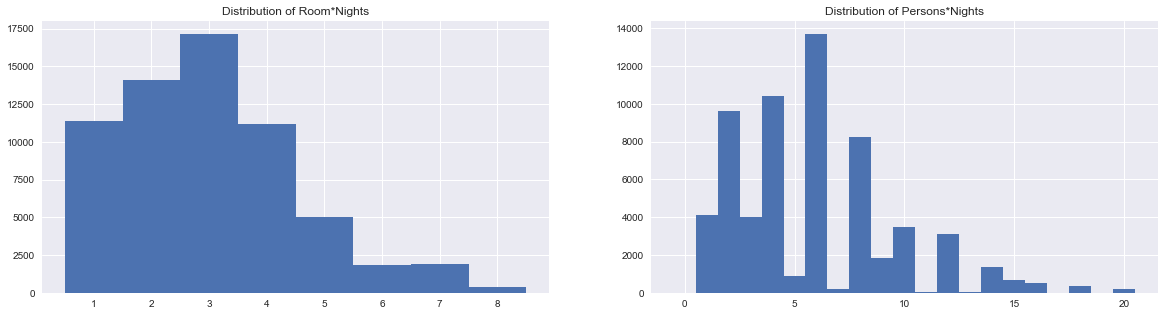

In [80]:
#plotting the distributions of RoomNights and PersonsNights
figure, axis = plt.subplots(1,2, figsize = (20,5))

#excluding thetop 1% values as they are substantially larger 
rnights99 = nights["RoomNights"][nights["RoomNights"] < nights["RoomNights"].quantile(0.99)]
pnights99 = nights["PersonsNights"][nights["PersonsNights"] < nights["PersonsNights"].quantile(0.99)]

axis[0].bar(sorted(rnights99.unique()), rnights99.value_counts().sort_index(), width = 1)
axis[0].set_title("Distribution of Room*Nights")

axis[1].bar(sorted(pnights99.unique()), pnights99.value_counts().sort_index(), width = 1)
axis[1].set_title("Distribution of Persons*Nights")

plt.show()

(0.0, 100.0)

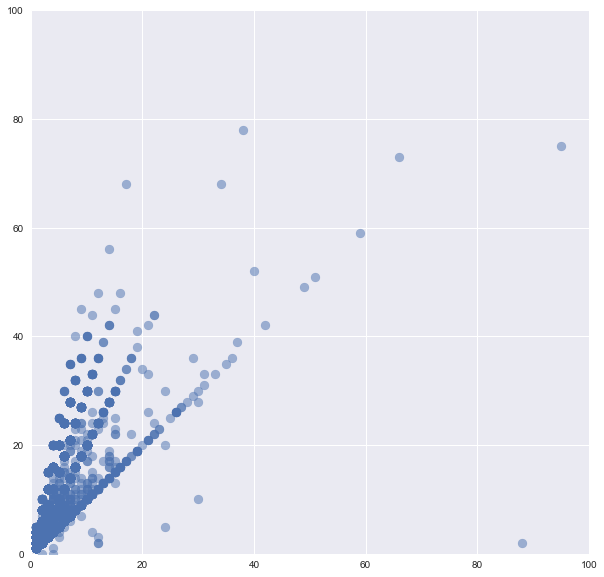

In [78]:
#plotting the relationship between RoomNights & PersonsNights 
plt.figure(figsize = (10,10))
plt.scatter(nights["RoomNights"], nights["PersonsNights"], s = 80, alpha = 0.5)
plt.xlim(0,100)
plt.ylim(0,100)

In [94]:
#for one time customers, compute the minimum number of persons that stayed at the hotel under this booking
one_time_cust = dataset[["BookingsCheckedIn", "RoomNights", "PersonsNights"]][dataset["BookingsCheckedIn"] == 1]
one_time_cust["Min_Persons"] = one_time_cust["PersonsNights"]/one_time_cust["RoomNights"]
print(one_time_cust["Min_Persons"].value_counts().sort_index())

0.0        2
1.0    13466
2.0    40091
3.0     6996
4.0     1553
5.0      107
Name: Min_Persons, dtype: int64


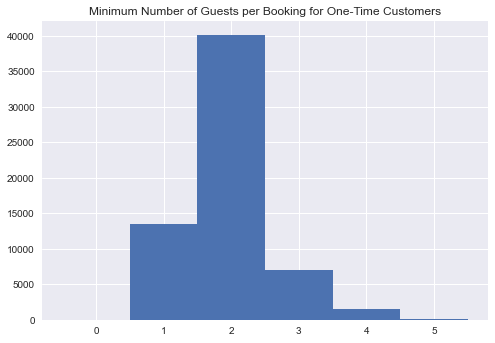

In [95]:
plt.bar(one_time_cust["Min_Persons"].unique(), one_time_cust["Min_Persons"].value_counts(), width = 1)
plt.title("Minimum Number of Guests per Booking for One-Time Customers")
plt.show()

## Part 4: Booking Preferences
Concerning **booking preferences**, around half of guests never usually voice any preferences, while the other half usually voices at least one preference. Notably, it is less common that customers usually voice more than one preference, and no customer has voiced more than four preferences.
In terms of specific preferences, the majority of possible booking preferences were voiced very rarely. Specifically, of the 13 options, 8 were asked for less than 1% of the time. The most frequently requested preferences are for: a  King-sized Bed (35%), a Twin Bed (14%), a Quiet Room (9%), and a High Floor (5%). This hierarchy does not change when contrasting customers with different numbers of preferences voiced. In other words, regardless of the number of preferences usually voice, the four top ones are chosen most frequently. There are two limitations to this generalisation. Firstly, as the King-sized bed is the highest preference, the twin-sized bed is requested substantially less frequently by customers that voice 2 or more preferences. Secondly and in line with this, customers who usually voice four preferences, tend to ask for a room close to the elevator as opposed to a room with a twin bed. 

In [114]:
#display absolute frequencies of outcomes
dataset[["SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib", "SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar", "SRQuietRoom"]].apply(lambda x: x.value_counts())

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,79621,83472,83569,83517,83352,83447,82485,54109,71675,83562,83297,83580,76203
1,3969,118,21,73,238,143,1105,29481,11915,28,293,10,7387


In [113]:
#display relative frequencies (as percentage points)
round(dataset[["SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib", "SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar", "SRQuietRoom"]].apply(lambda x: x.value_counts(normalize = True)) * 100, 2)

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,95.25,99.86,99.97,99.91,99.72,99.83,98.68,64.73,85.75,99.97,99.65,99.99,91.16
1,4.75,0.14,0.03,0.09,0.28,0.17,1.32,35.27,14.25,0.03,0.35,0.01,8.84


In [224]:
#compute the total number of preferences usualyl voiced by customers 
preferences = dataset[["SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", "SRBathtub", "SRShower", "SRCrib", "SRKingSizeBed", "SRTwinBed", "SRNearElevator", "SRAwayFromElevator", "SRNoAlcoholInMiniBar", "SRQuietRoom"]]

preferences["total_pref"] = preferences.sum(axis = 1)

C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/1614683977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preferences["total_pref"] = preferences.sum(axis = 1)


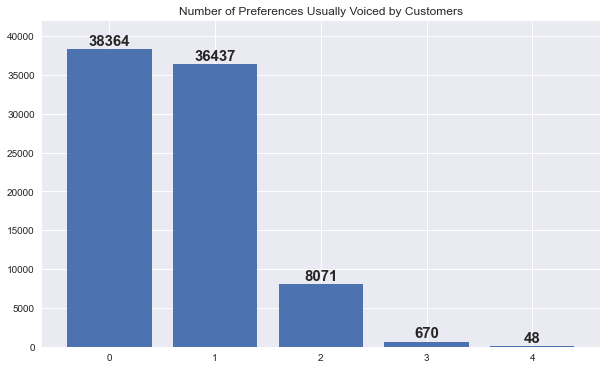

In [229]:
plt.figure(figsize= (10,6))
plt.bar(preferences["total_pref"].unique(), preferences["total_pref"].value_counts().sort_index())
plt.title("Number of Preferences Usually Voiced by Customers")
plt.ylim(0,42000)

for i in range(5):
   plt.text(i, preferences["total_pref"].value_counts().sort_index()[i] + 500, preferences["total_pref"].value_counts().sort_index()[i], ha = 'center', fontdict={"size":15, "weight":"bold"})

plt.show()

Text(0.5, 1.0, 'Frequency of different Preferences')

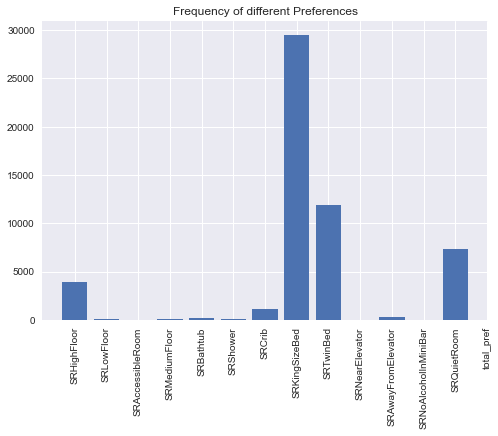

In [234]:
plt.bar(preferences.sum(axis = 0).index[:13], preferences.sum(axis = 0)[:13])
plt.xticks(preferences.columns, rotation = 90)
plt.title("Frequency of different Preferences")

C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/167115422.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0,0].set_xticklabels(preferences.columns, rotation = 90)
C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/167115422.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0,1].set_xticklabels(preferences.columns, rotation = 90)
C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/167115422.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,0].set_xticklabels(preferences.columns, rotation = 90)
C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/167115422.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1,1].set_xticklabels(preferences.columns, rotation = 90)


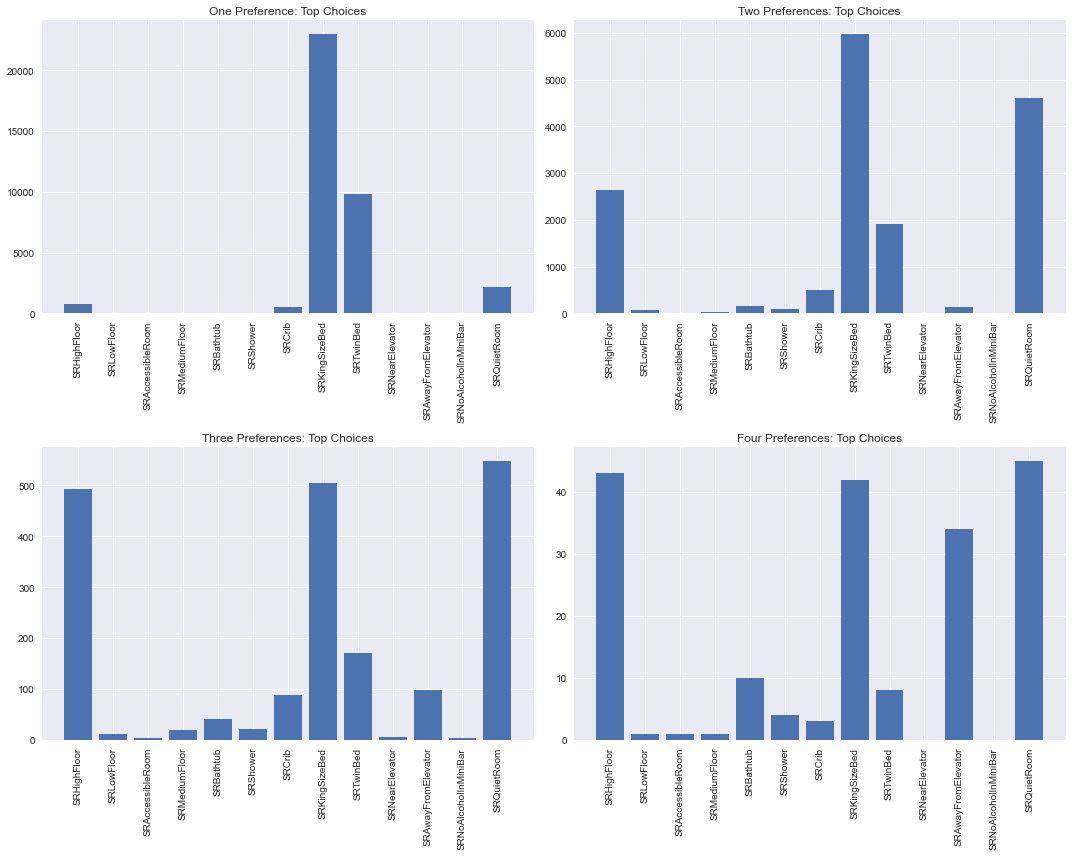

In [235]:
#depending on the number of preferences usually voiced, plot which preferences were voiced most commonly
figure, axis = plt.subplots(2,2, figsize = (15,12))

axis[0,0].bar(preferences[preferences["total_pref"] == 1].sum(axis = 0).index[:13], preferences[preferences["total_pref"] == 1].sum(axis = 0)[:13])
axis[0,0].set_xticklabels(preferences.columns, rotation = 90)
axis[0,0].set_title("One Preference: Top Choices")

axis[0,1].bar(preferences[preferences["total_pref"] == 2].sum(axis = 0).index[:13], preferences[preferences["total_pref"] == 2].sum(axis = 0)[:13])
axis[0,1].set_xticklabels(preferences.columns, rotation = 90)
axis[0,1].set_title("Two Preferences: Top Choices")

axis[1,0].bar(preferences[preferences["total_pref"] == 3].sum(axis = 0).index[:13], preferences[preferences["total_pref"] == 3].sum(axis = 0)[:13])
axis[1,0].set_xticklabels(preferences.columns, rotation = 90)
axis[1,0].set_title("Three Preferences: Top Choices")

axis[1,1].bar(preferences[preferences["total_pref"] == 4].sum(axis = 0).index[:13], preferences[preferences["total_pref"] == 4].sum(axis = 0)[:13])
axis[1,1].set_xticklabels(preferences.columns, rotation = 90)
axis[1,1].set_title("Four Preferences: Top Choices")

plt.tight_layout()
#plt.show(0)

## Part 5: Time-Related Variables

In [368]:
round(dataset[["AverageLeadTime", "DaysSinceCreation", "DaysSinceLastStay", "DaysSinceFirstStay"]].describe(), 2)

,AverageLeadTime,DaysSinceCreation,DaysSinceLastStay,DaysSinceFirstStay
count,83590.00,83590.00,83590.00,83590.00
mean,66.20,453.64,401.07,403.35
std,87.76,313.39,347.20,347.97
min,-1.00,0.00,-1.00,-1.00
25%,0.00,177.00,26.00,27.00
50%,29.00,397.00,366.00,369.00
75%,103.00,723.00,693.00,697.00
max,588.00,1095.00,1104.00,1186.00


### Part 5.1 Average Lead Time
In terms of the **Average Lead Time**, it is notable that while an average lead time of zero frequently indicates a customer never made a booking, there is a small group of customers that must have make a booking on the same date as their arrival date. Aside from this, lead time shows an exponential decrease meaning shorter average lead times are increasingly more common. 

In [281]:
#there are 60867 cases where someone booked a hotel at least one day before their arrival date
print((dataset["AverageLeadTime"] > 0 ).value_counts())
print("\n")

#there are 2794 cases where someone booked a hotel on the same day as their arrival date
print( ( (dataset["AverageLeadTime"] == 0) & ((dataset["BookingsCanceled"] > 0) | (dataset["BookingsNoShowed"] > 0) | (dataset["BookingsCheckedIn"] > 0))).value_counts() )
print("\n")

#consequently, there are 19919 customers in the system that never completed a booking
print( ( (dataset["AverageLeadTime"] == 0) & ((dataset["BookingsCanceled"] == 0) & (dataset["BookingsNoShowed"] == 0) & (dataset["BookingsCheckedIn"] == 0))).value_counts() )

True     60867
False    22723
Name: AverageLeadTime, dtype: int64


False    80796
True      2794
dtype: int64


False    63671
True     19919
dtype: int64


83590

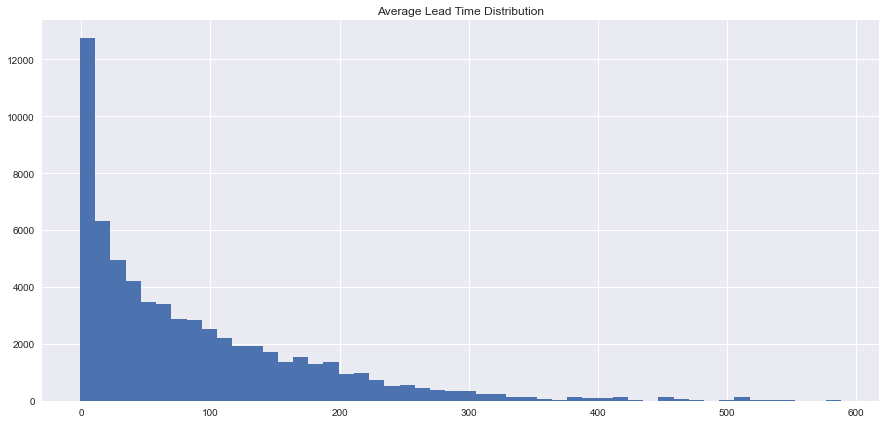

In [285]:
#plot average lead time for cases that completed one or more bookings
plt.figure(figsize=(15,7))
plt.hist(dataset["AverageLeadTime"][(dataset["BookingsCanceled"] > 0) | (dataset["BookingsNoShowed"] > 0) | (dataset["BookingsCheckedIn"] > 0)], 50)
plt.title("Average Lead Time Distribution")
plt.show()

### Part 5.2 Days Since
In general, substantially more customers were created in the last 350 days compared to the periods before after a dip around 400 days ago. Another notable dip occured between 700 and 800 days ago where less customers were registered. This recent increase in customer creations coincides with an increase in the since more customers stayed for the first time. Notably, there has also been a separate increase in the days since last stay implying that repeat customers might have been increasing as of lately. On another note, the difference between the first and last stay (for customers that completed more than one boooking) tends to be rather small and becomes exponentially less common with an increase in days. 

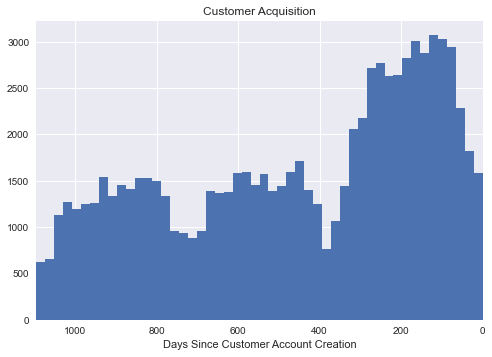

In [303]:
#plt.xlim(max(dataset["DaysSinceCreation"]), min(dataset["DaysSinceCreation"]))
plt.hist(dataset["DaysSinceCreation"],50)
plt.xlim(max(dataset["DaysSinceCreation"]), min(dataset["DaysSinceCreation"]))
plt.title("Customer Acquisition")
plt.xlabel("Days Since Customer Account Creation")
plt.show()

In [321]:
#compute the difference in days between last and first stay
days = dataset[["DaysSinceLastStay", "DaysSinceFirstStay"]][dataset["BookingsCheckedIn"] > 1]
days["Difference"] = days["DaysSinceFirstStay"] - days["DaysSinceLastStay"]

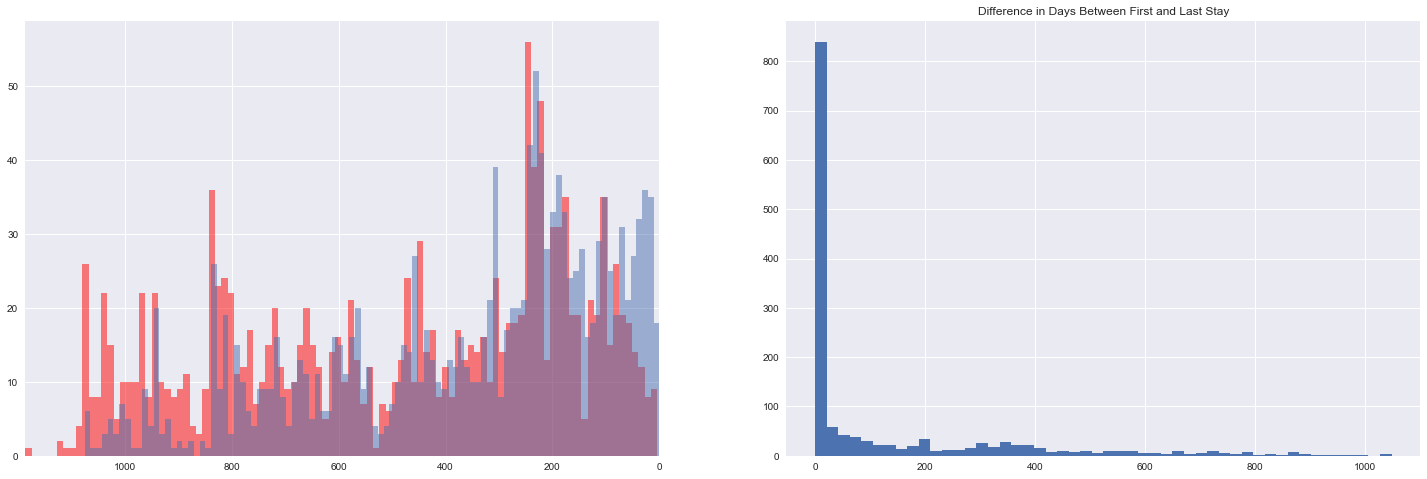

In [367]:
#plot the difference in days between first and last stay
figure, axis = plt.subplots(1,2, figsize = (25,8))

axis[0].hist(days["DaysSinceFirstStay"],100, alpha = 0.5, color = "red")
axis[0].hist(days["DaysSinceLastStay"],100, alpha = 0.5)
axis[0].set_xlim(max(days["DaysSinceFirstStay"]), 0)

axis[1].hist(days["Difference"],50)
axis[1].set_title("Difference in Days Between First and Last Stay")

plt.show()

## Part 6: Other Variables
In terms of the **Distribution Channel, customers typically rely on Travel Agents followed by Direct Channels. 
For the customer **Market Segments**, the majority falls into the other category, followed by Direct, Travel Agent, and Group. The other categories are represented only to a much lesser degree. 
Notably, while several of these categories exist across both variables, they do not correpsond 1 to 1. This is especially notable for the Corporate Distribution Channel where customers are distributed across all other market segments outside of the Corporate one as well. The closest overlaps seem to occur between Direct & Direct. 

In [373]:
dataset[["MarketSegment", "DistributionChannel"]].apply(lambda x: x.value_counts())

,MarketSegment,DistributionChannel
Aviation,244.0,NaN
Complementary,510.0,NaN
Corporate,2169.0,2600.0
Direct,11457.0,11912.0
Electronic Distribution,NaN,509.0
Groups,9501.0,NaN
Other,48039.0,NaN
Travel Agent/Operator,11670.0,68569.0


In [411]:
pd.crosstab(dataset["MarketSegment"], dataset["DistributionChannel"])

DistributionChannel,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
MarketSegment,,,,
Aviation,239,0,0,5
Complementary,14,393,0,103
Corporate,1724,46,2,397
Direct,14,11219,5,219
Groups,478,134,1,8888
Other,34,96,496,47413
Travel Agent/Operator,97,24,5,11544


C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/2642116058.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(sorted(dataset["MarketSegment"].unique()), rotation = 90)
C:\Users\Computer\AppData\Local\Temp/ipykernel_11780/2642116058.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(sorted(dataset["DistributionChannel"].unique()), rotation = 90)


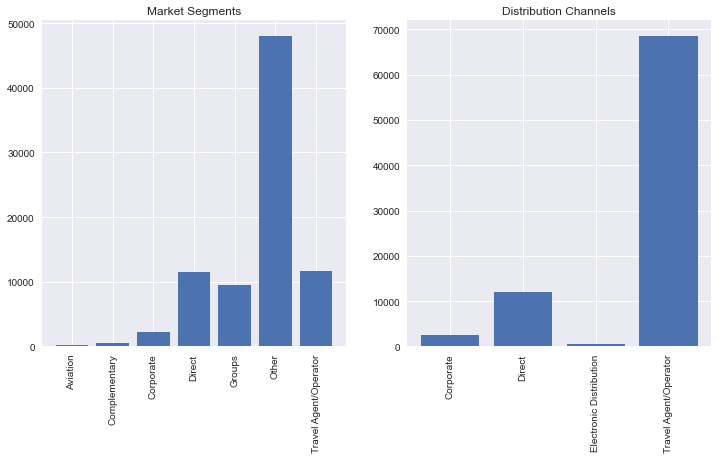

In [401]:
figure, axis = plt.subplots(1,2, figsize = (12,6))

axis[0].bar(sorted(dataset["MarketSegment"].unique()), dataset["MarketSegment"].value_counts().sort_index())
axis[0].set_xticklabels(sorted(dataset["MarketSegment"].unique()), rotation = 90)
axis[0].set_title("Market Segments")

axis[1].bar(sorted(dataset["DistributionChannel"].unique()), dataset["DistributionChannel"].value_counts().sort_index())
axis[1].set_xticklabels(sorted(dataset["DistributionChannel"].unique()), rotation = 90)
axis[1].set_title("Distribution Channels")

plt.show()

## Part 7: Summary of Descriptives